# <font color='blue'>Module 10 - CCPS 844 Data Mining</font>

[Support Vector Machine Classification](#a_ID)

[Learning Social_Network_Ads with SVM](#b_ID)

[Formatting the Confusion Matrix](#c_ID)

# <a id="a_ID">Support Vector Machine Classification</a>
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

http://scikit-learn.org/stable/modules/svm.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

clf.predict([[2., 2.]])

array([1])

In [3]:
X

[[0, 0], [1, 1]]

In [4]:
y

[0, 1]

In [5]:
clf.predict([[0., 0.]])

array([0])

In [6]:
clf.predict([[0., 0.]])

array([0])

### get support vectors

In [7]:
clf.support_vectors_


array([[0., 0.],
       [1., 1.]])

### get indices of support vectors


In [8]:
clf.support_ 

array([0, 1])

### get number of support vectors for each class

In [9]:
clf.n_support_ 

array([1, 1])

Init signature: svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, optional (default=1.0)
    Penalty parameter C of the error term.

kernel : string, optional (default='rbf')
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable.
     If none is given, 'rbf' will be used. If a callable is given it is
     used to pre-compute the kernel matrix from data matrices; that matrix
     should be an array of shape ``(n_samples, n_samples)``.

degree : int, optional (default=3)
    Degree of the polynomial kernel function ('poly').
    Ignored by all other kernels.

gamma : float, optional (default='auto')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    If gamma is 'auto' then 1/n_features will be used instead.

coef0 : float, optional (default=0.0)
    Independent term in kernel function.
    It is only significant in 'poly' and 'sigmoid'.

probability : boolean, optional (default=False)
    Whether to enable probability estimates. This must be enabled prior
    to calling `fit`, and will slow down that method.

shrinking : boolean, optional (default=True)
    Whether to use the shrinking heuristic.

tol : float, optional (default=1e-3)
    Tolerance for stopping criterion.

cache_size : float, optional
    Specify the size of the kernel cache (in MB).

class_weight : {dict, 'balanced'}, optional
    Set the parameter C of class i to class_weight[i]*C for
    SVC. If not given, all classes are supposed to have
    weight one.
    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

verbose : bool, default: False
    Enable verbose output. Note that this setting takes advantage of a
    per-process runtime setting in libsvm that, if enabled, may not work
    properly in a multithreaded context.

max_iter : int, optional (default=-1)
    Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape : 'ovo', 'ovr', default='ovr'
    Whether to return a one-vs-rest ('ovr') decision function of shape
    (n_samples, n_classes) as all other classifiers, or the original
    one-vs-one ('ovo') decision function of libsvm which has shape
    (n_samples, n_classes * (n_classes - 1) / 2).

    .. versionchanged:: 0.19
        decision_function_shape is 'ovr' by default.

    .. versionadded:: 0.17
       *decision_function_shape='ovr'* is recommended.

    .. versionchanged:: 0.17
       Deprecated *decision_function_shape='ovo' and None*.

random_state : int, RandomState instance or None, optional (default=None)
    The seed of the pseudo random number generator to use when shuffling
    the data.  If int, random_state is the seed used by the random number
    generator; If RandomState instance, random_state is the random number
    generator; If None, the random number generator is the RandomState
    instance used by `np.random`.

Attributes
----------
support_ : array-like, shape = [n_SV]
    Indices of support vectors.

support_vectors_ : array-like, shape = [n_SV, n_features]
    Support vectors.

n_support_ : array-like, dtype=int32, shape = [n_class]
    Number of support vectors for each class.

dual_coef_ : array, shape = [n_class-1, n_SV]
    Coefficients of the support vector in the decision function.
    For multiclass, coefficient for all 1-vs-1 classifiers.
    The layout of the coefficients in the multiclass case is somewhat
    non-trivial. See the section about multi-class classification in the
    SVM section of the User Guide for details.

coef_ : array, shape = [n_class-1, n_features]
    Weights assigned to the features (coefficients in the primal
    problem). This is only available in the case of a linear kernel.

    `coef_` is a readonly property derived from `dual_coef_` and
    `support_vectors_`.

intercept_ : array, shape = [n_class * (n_class-1) / 2]
    Constants in decision function.

Examples
--------
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
>>> y = np.array([1, 1, 2, 2])
>>> from sklearn.svm import SVC
>>> clf = SVC()
>>> clf.fit(X, y) #doctest: +NORMALIZE_WHITESPACE
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
>>> print(clf.predict([[-0.8, -1]]))
[1]

See also
--------
SVR
    Support Vector Machine for Regression implemented using libsvm.

LinearSVC
    Scalable Linear Support Vector Machine for classification
    implemented using liblinear. Check the See also section of
    LinearSVC for more comparison element.
File:           c:\users\naeem\anaconda3\lib\site-packages\sklearn\svm\classes.py
Type:           ABCMeta

# <a id="b_ID">Learning Social Network Ads Dataset</a>

### Importing the dataset

In [10]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values#Select the columns age and estimated Salary
y = dataset.iloc[:, 4].values#Select the column Purchased (1 if purchased 0 otherwise)

**Displaying few records from X and y**

In [11]:
X[[0,1,2,3,7,8,9,10],:]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000]], dtype=int64)

In [12]:
y[[0,1,2,3,7,8,9,10]]

array([0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Fitting SVM to the Training set


In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)

#### Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

# <a id="c_ID">Formatting the Confusion Matrix</a>

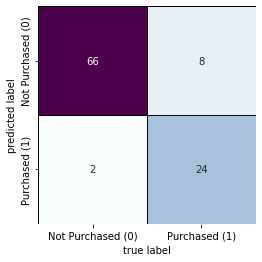

In [19]:
import seaborn as sns;
faceLabels = ['Not Purchased (0)','Purchased (1)']
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)